# Data Exploration: Munich Bicycle Counting Stations

There are 6 bicycle counting stations in munich and all of them also record meteorological data.


## Load the data

In [ ]:
import pandas as pd
from matplotlib import pyplot as plt

# Read the counting data from the json file, set the datum as index, but also keep the datum column
counting_data_file = "../datasources/munich-bicycle-counting-stations/cleaned/bicycle-counting-station-daily.json"
df = pd.read_json(counting_data_file, lines=True)
df['datum'] = pd.to_datetime(df['datum'], unit='ms')
df['datum_index'] = df['datum']
df.set_index('datum_index', inplace=True)

# Data should be sorted in the file, but just to be sure
df.sort_values(by='datum', inplace=True)

# Calculate the average temperature
df['avg-temp'] = (df['min-temp'] + df['max-temp']) / 2

# Create a complete date range from min to max date in your data
complete_date_range = pd.date_range(start=df.index.min(), end=df.index.max())

# Find missing dates
missing_dates = complete_date_range.difference(df.index)

assert len(missing_dates) == 0
print("There are no missing dates, continuing")

In [ ]:


aggregation_functions = {'datum': 'first',  # Replace 'Datum' with the actual date column
                         'min-temp': 'first',
                         'max-temp': 'first',
                         'avg-temp': 'first',
                         'niederschlag': 'first',
                         'bewoelkung': 'first',
                         'sonnenstunden': 'first',
                         'gesamt': 'sum'}

aggregated_df = df.groupby(df['datum']).aggregate(aggregation_functions)

aggregated_df.head(20)

In [12]:
# Extract year and month from 'datum'
df['month'] = df['datum'].dt.month

# Define your aggregation functions
aggregation_functions = {
    'min-temp': 'mean',  # you might want to use mean, min or max depending on the use case
    'max-temp': 'mean',
    'avg-temp': 'mean',
    'niederschlag': 'sum',
    'bewoelkung': 'sum',
    'sonnenstunden': 'sum',
    'gesamt': 'sum'  # Assuming you want the total 'gesamt' for each month
}

# Group by 'month'
df_monthly = df.groupby(['month']).aggregate(aggregation_functions)

# Check the result
df_monthly.head()

,min-temp,max-temp,avg-temp,niederschlag,bewoelkung,sonnenstunden,gesamt
month,,,,,,,
1,-2.069355,3.916052,0.923349,4589.2,215602,5312.6,1813595
2,-1.961435,5.702616,1.870591,3527.0,177938,8015.2,2015576
3,0.770814,10.601536,5.686175,3265.6,173186,13501.8,3287138
4,4.334444,15.554841,9.944643,3958.0,164172,16725.0,4287772
5,8.365745,18.927803,13.646774,9664.0,182876,17177.6,5269982


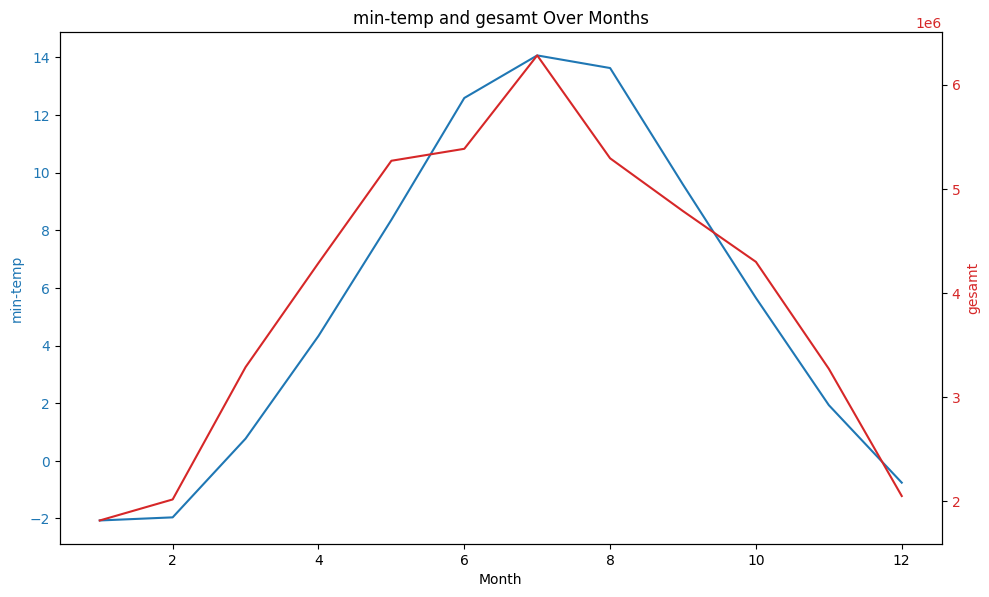

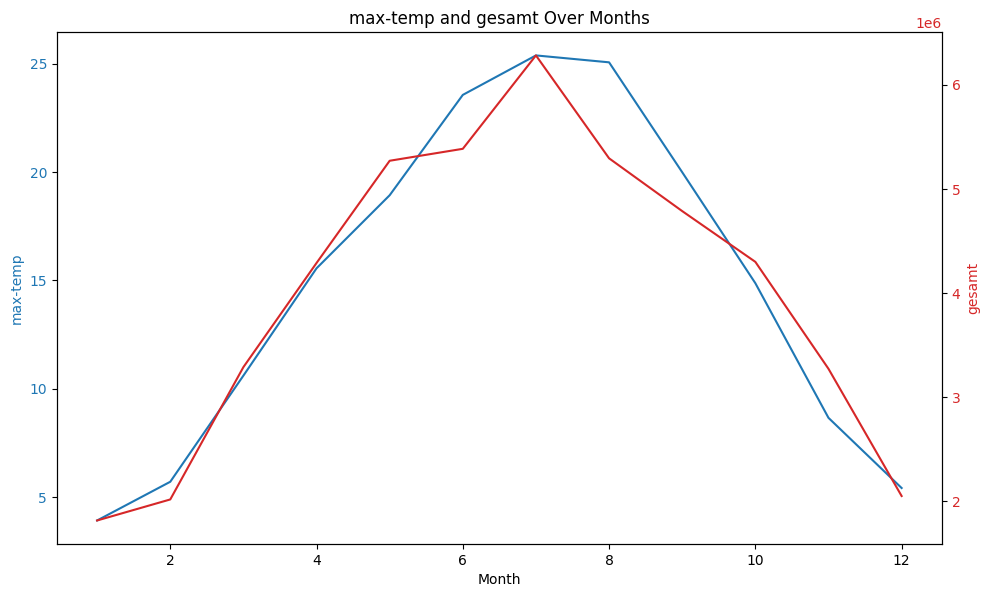

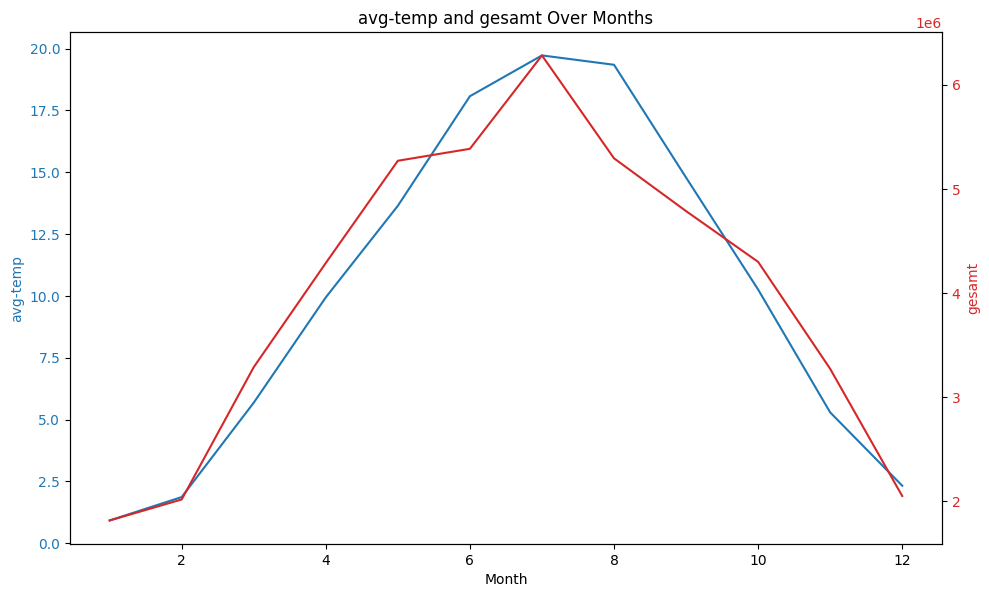

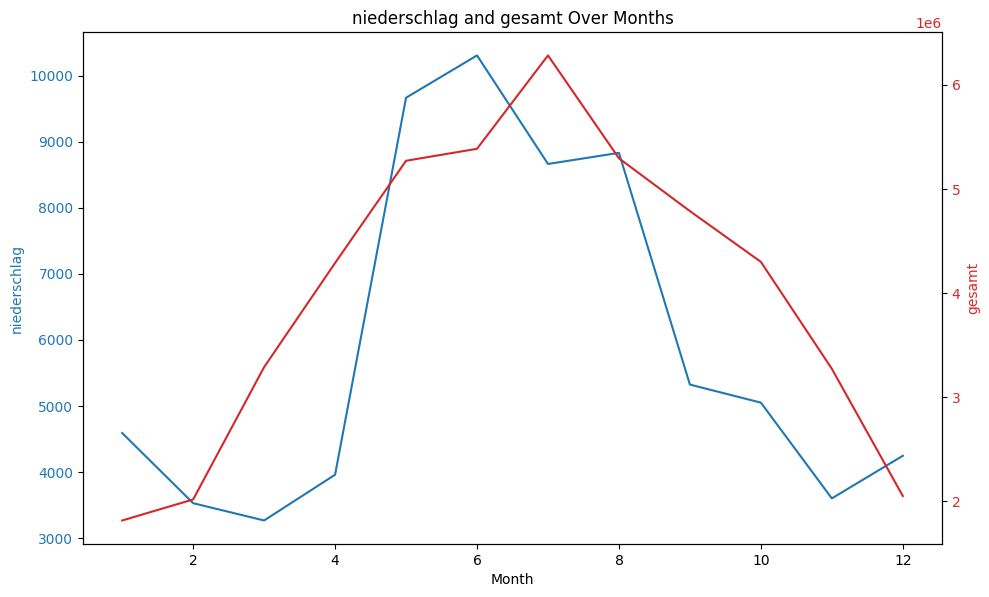

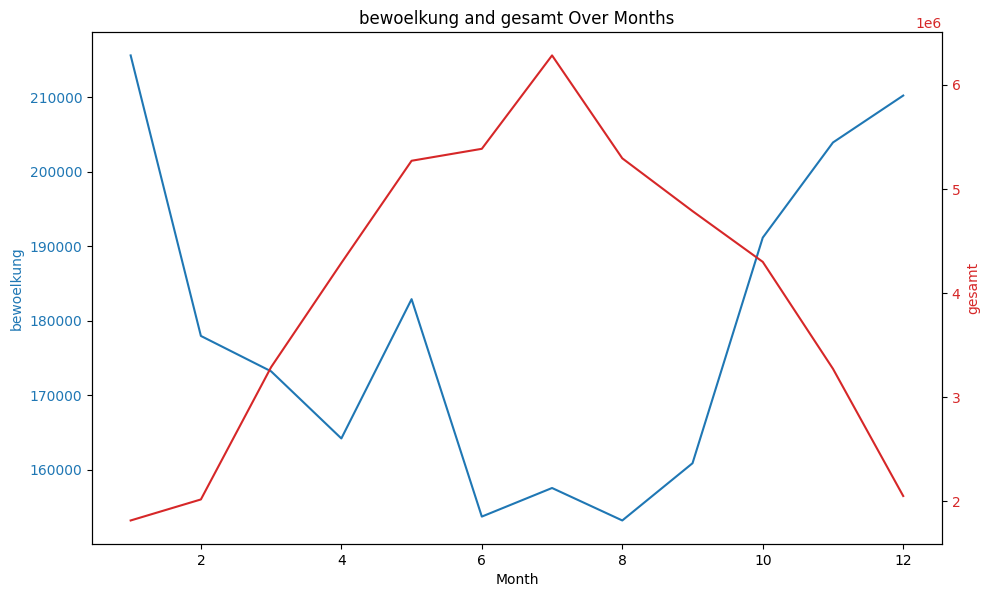

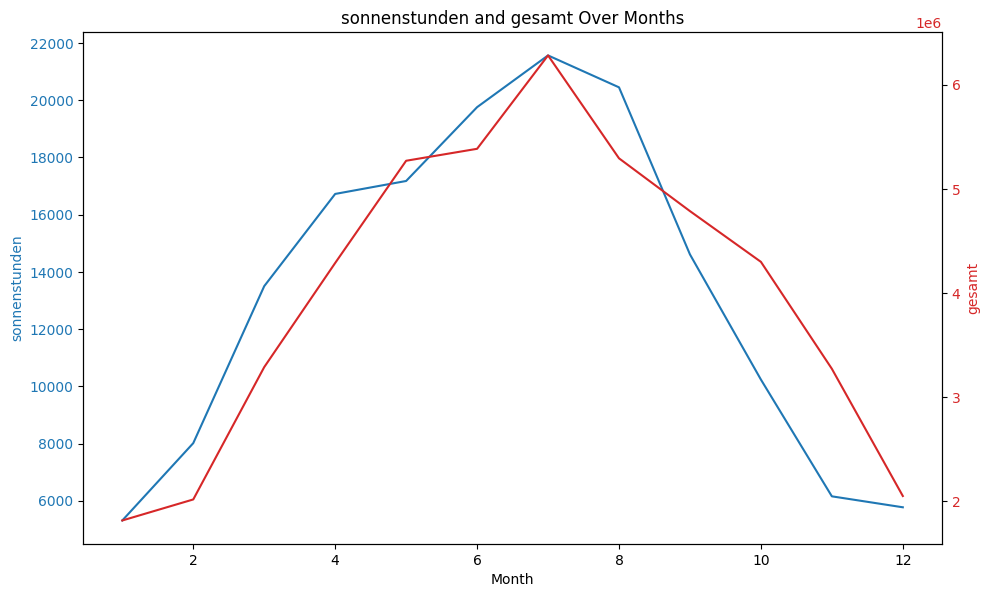

In [13]:
import matplotlib.pyplot as plt

# List of features to plot
features = ['min-temp', 'max-temp', 'avg-temp', 'niederschlag', 'bewoelkung', 'sonnenstunden']

for feature in features:
    fig, ax1 = plt.subplots(figsize=(10, 6))

    color = 'tab:blue'
    ax1.set_xlabel('Month')
    ax1.set_ylabel(feature, color=color)
    ax1.plot(df_monthly.index, df_monthly[feature], color=color)
    ax1.tick_params(axis='y', labelcolor=color)

    ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

    color = 'tab:red'
    ax2.set_ylabel('gesamt', color=color)  # we already handled the x-label with ax1
    ax2.plot(df_monthly.index, df_monthly['gesamt'], color=color)
    ax2.tick_params(axis='y', labelcolor=color)

    fig.tight_layout()  # otherwise the right y-label is slightly clipped
    plt.title(f'{feature} and gesamt Over Months')
    plt.show()